In this project we are going to fit polynomials to some data, by the help of the neural network.

In [ ]:
import torch
from torch import nn
import random
import matplotlib.pyplot as plt

In [ ]:
# number of data = 5
# pair of (x,y) of data :

data = [[1,2],[2,4],[3,10],[4,17],[5,20]]

# mission :
# find a __linear__ polynomial: A*x+B

In [ ]:
# !!! important note:
#       number of layers and number of outputs of the model
#       depends on the desired polynomial.

In [ ]:
model = nn.Sequential(nn.Linear(1,4),nn.ReLU(),nn.Linear(4,5),nn.ReLU(),nn.Linear(5,2)) # two hidden layers work well

In [ ]:
criterion = nn.MSELoss() # mean square error
optimizer = torch.optim.SGD(model.parameters(),lr=0.005,momentum=0.5) # low momentum (feedback factor) to not diverge

In [ ]:
# some lists to gather values:
pre_y=[]
real_y=[]
loss_list=[]
iter=[]

for j in range(100): # 100 time of training

    # choosing an arbitrary pair of data (shuffling the epoch):
    i = random.randint(0, 4)
    x = float(data[i][0])
    y = float(data[i][1])


    out_model_1 , out_model_2 = model(torch.tensor([x/100])) # using 0.01 factor to not diverge the outputs of model

    A = out_model_1.squeeze() # get the estimated coefficients of polynomial
    B = out_model_2.squeeze()

    loss = criterion(A*x+B, torch.tensor([y]))

    y_pre = A.item()*x+B.item()

    pre_y.append(y_pre)
    real_y.append(y)
    iter.append(j)
    loss_list.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


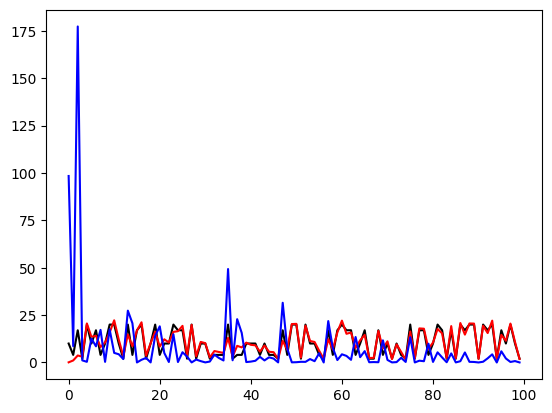

In [ ]:
plt.plot(iter,real_y,color="black")     # black diagram for the y's of data
plt.plot(iter,pre_y,color="red")        # red   diagram for the prediction of the model
plt.plot(iter,loss_list,color="blue")   # blue  diagram for the error of model

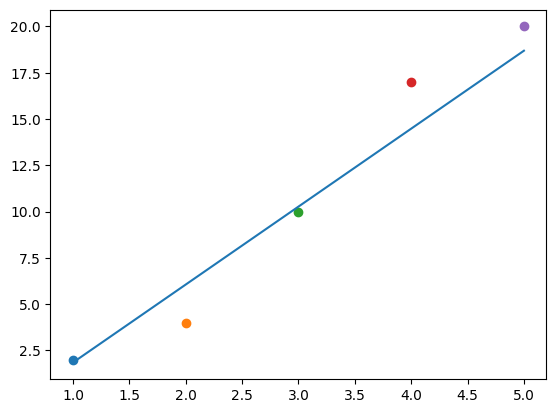

In [ ]:
# plot the data and the estimated polynomial:
import numpy as np

for i in data:
    plt.scatter(i[0],i[1])  # dots are the data

x_ = np.linspace(1, 5, 100)
plt.plot(x_, A.item()*x_+B.item()) # continuous line is the polynomial


In [ ]:
print(A.item(),B.item()) # the coefficients of the polynomial A*x+B

4.211009979248047 -2.364011287689209


In [ ]:
print(loss.item())   # the error of the model

0.023409400135278702


In [ ]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.0053],
                      [-0.2535],
                      [-0.3519],
                      [-0.0795]])),
             ('0.bias', tensor([ 0.3745,  0.4633, -0.7277, -0.0690])),
             ('2.weight',
              tensor([[ 0.3893,  0.5005,  0.3773,  0.2724],
                      [ 0.2135,  0.1266,  0.4166, -0.1705],
                      [-0.1630, -0.4703, -0.1945, -0.2664],
                      [-0.4394, -0.0060,  0.3927,  0.3421],
                      [ 0.0839, -0.0497, -0.1314, -0.1318]])),
             ('2.bias', tensor([ 0.2659,  1.2140, -0.0763, -0.0520, -0.0517])),
             ('4.weight',
              tensor([[ 0.4828,  1.0951,  0.0716, -0.1849, -0.1007],
                      [-0.7730, -1.3375,  0.3062,  0.0164,  0.2207]])),
             ('4.bias', tensor([ 2.3198, -0.0289]))])

In [ ]:
############################################################################################

### Now for the **quadratic** polynomial: A*x**2 + B*x + C

In [ ]:
import torch
from torch import nn
import random
import matplotlib.pyplot as plt

In [ ]:
data = [[1,4],[2,9],[3,15],[4,27],[5,35],[6,50],[7,70],[8,85],[9,100],[10,120]]
# mission :
# find a __quadratic__ polynomial: A*x**2 + B*x + C

In [ ]:
model = nn.Sequential(nn.Linear(3,10),nn.Linear(10,5),nn.Linear(5,3))
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.0005,momentum=0.5)

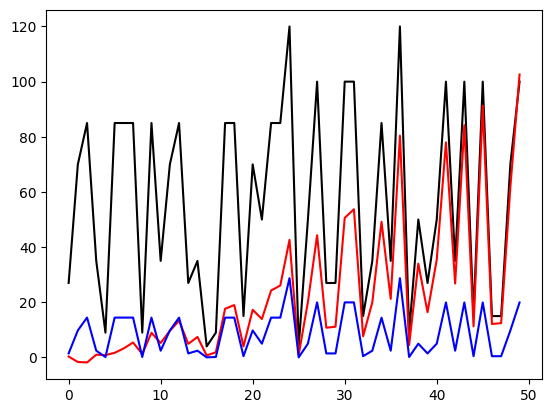

In [ ]:
pre_y=[]
real_y=[]
loss_list=[]
iter=[]

for j in range(50):

    i = random.randint(0, 9)
    x = float(data[i][0])
    a = x**2/500
    b = x/500
    c = 1/500
    y = float(data[i][1])


    out_model_1 , out_model_2, out_model_3 = model(torch.tensor([a,b,c]))

    A = out_model_1.squeeze()
    B = out_model_2.squeeze()
    C = out_model_3.squeeze()


    loss = criterion((A*a+B*b+C*c), torch.tensor([y]))

    y_pre = A.item()*x**2+B.item()*x+C.item()

    pre_y.append(y_pre)
    real_y.append(y)
    iter.append(j)
    loss_list.append(loss.item()/500)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

plt.plot(iter,real_y,color="black")     # black diagram for the y's of data
plt.plot(iter,pre_y,color="red")        # red   diagram for the prediction of the model
plt.plot(iter,loss_list,color="blue")   # blue  diagram for the error of model

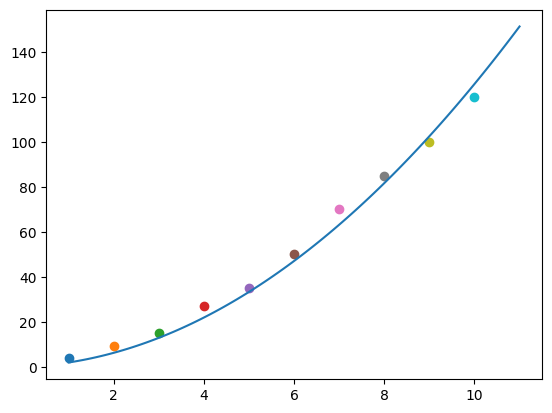

In [ ]:
import numpy as np

for i in data:
    plt.scatter(i[0],i[1])  # dots are the data

x_ = np.linspace(1, 11, 100)
plt.plot(x_, (A.item()*(x_**2)+B.item()*(x_)+C.item())) # continuous curve is the polynomial


In [ ]:
print(A.item(),B.item(),C.item()) # the coefficients of the polynomial

1.1836390495300293 0.7499096989631653 -0.05440589785575867


In [ ]:
print(loss_list[-1])   # the final error of the model

19.918029296875
